In [33]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")



# Step 2: Load the dataset

In [7]:
df = pd.read_excel("Pakistan_Poverty_Dataset_2000_2023.xlsx")

In [8]:
print(df.head())


   Year  Population (millions)  GDP Growth Rate (%)  Inflation Rate (%)  \
0  2000                  138.0                  4.2                 3.6   
1  2001                  140.5                  3.1                 4.4   
2  2002                  143.0                  3.7                 3.5   
3  2003                  145.5                  5.0                 3.1   
4  2004                  148.0                  6.4                 7.4   

   Unemployment Rate (%)  Poverty Headcount Ratio (%)  \
0                    6.0                         34.7   
1                    6.2                         33.5   
2                    6.1                         32.1   
3                    5.8                         30.2   
4                    5.5                         28.6   

   Agriculture Growth Rate (%)  Government Social Spending (% of GDP)  \
0                          2.5                                    3.0   
1                          2.0                              

# Check the Missing values

In [6]:
print(df.isnull().sum())


Year                                     0
Population (millions)                    0
GDP Growth Rate (%)                      0
Inflation Rate (%)                       0
Unemployment Rate (%)                    0
Poverty Headcount Ratio (%)              0
Agriculture Growth Rate (%)              0
Government Social Spending (% of GDP)    0
External Debt (USD billions)             0
Climate Disasters (count)                0
dtype: int64


# Rename long column name

In [15]:
df.columns = df.columns.str.strip()  # remove spaces

df.rename(columns={
    'Unemployment Rate (%)': 'Unemployment_Rate',
    'Year ': 'Year'  # if your year column has space
}, inplace=True)

print(df.columns)  

Index(['Year', 'Population (millions)', 'GDP Growth Rate (%)',
       'Inflation Rate (%)', 'Unemployment_Rate',
       'Poverty Headcount Ratio (%)', 'Agriculture Growth Rate (%)',
       'Government Social Spending (% of GDP)', 'External Debt (USD billions)',
       'Climate Disasters (count)'],
      dtype='object')


# Plot Unemployment Rate Over Time

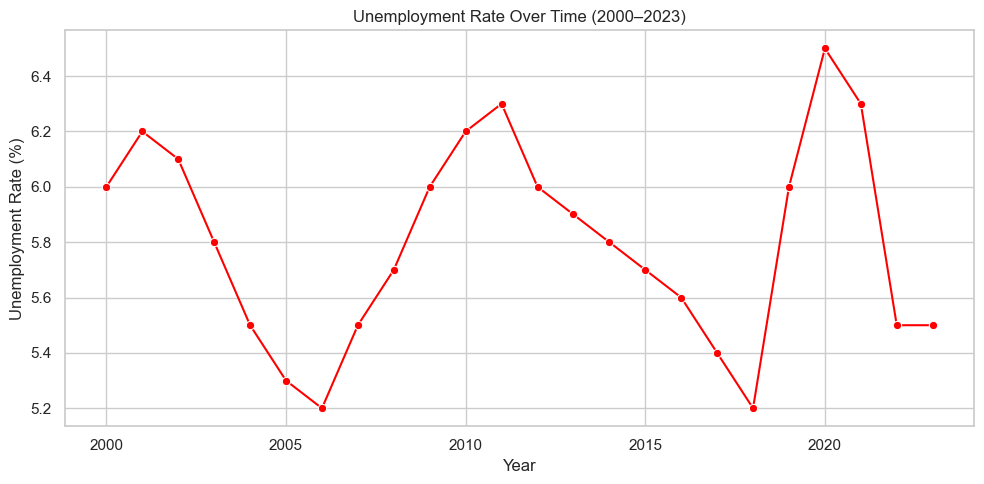

In [16]:
# Step 6: Unemployment Trend Over Time
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Unemployment_Rate', data=df, marker='o', color='red')
plt.title('Unemployment Rate Over Time (2000–2023)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()



# Compare with Other Economic Factors

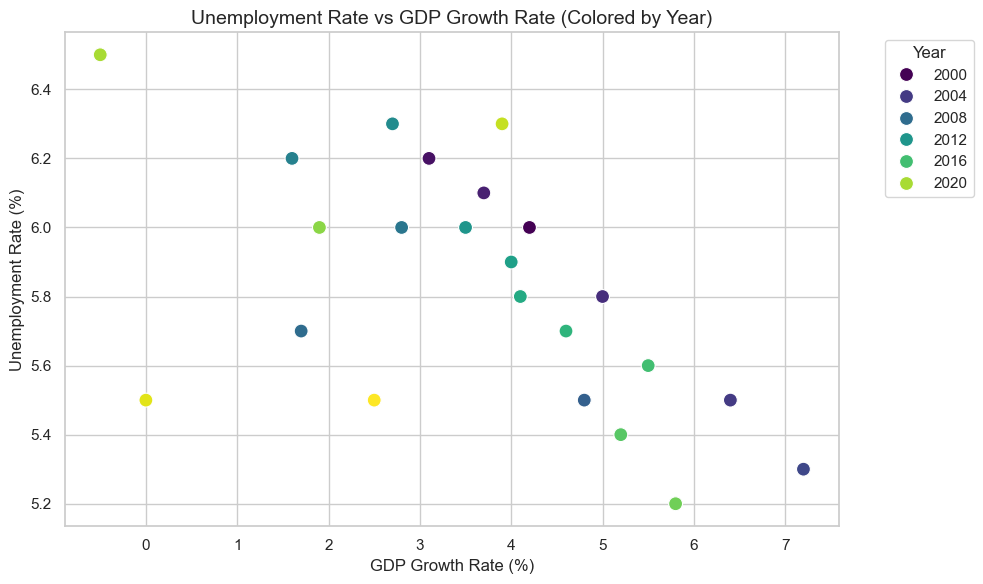

In [30]:
# Unemployment vs GDP Growth
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='GDP_Growth',
    y='Unemployment_Rate',
    data=df,
    hue='Year',             # 🎨 Add color by year
    palette='viridis',      # Better color separation
    s=100                   # Dot size
)

plt.title('Unemployment Rate vs GDP Growth Rate (Colored by Year)', fontsize=14)
plt.xlabel('GDP Growth Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [27]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces

df.rename(columns={
    'GDP Growth Rate (%)': 'GDP_Growth',
    'Inflation Rate (%)': 'Inflation_Rate',
    'Poverty Headcount Ratio (%)': 'Poverty_Ratio'
}, inplace=True)


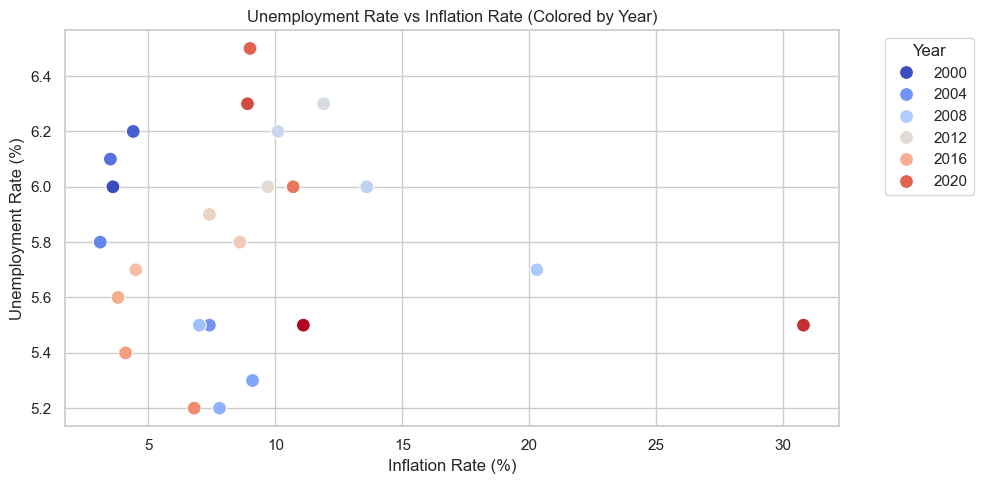

In [31]:
plt.figure(figsize=(10, 5))

sns.scatterplot(
    x='Inflation_Rate',         # ✅ Fixed name
    y='Unemployment_Rate',      # ✅ Already correct
    data=df,
    hue='Year',
    palette='coolwarm',
    s=100
)

plt.title('Unemployment Rate vs Inflation Rate (Colored by Year)')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


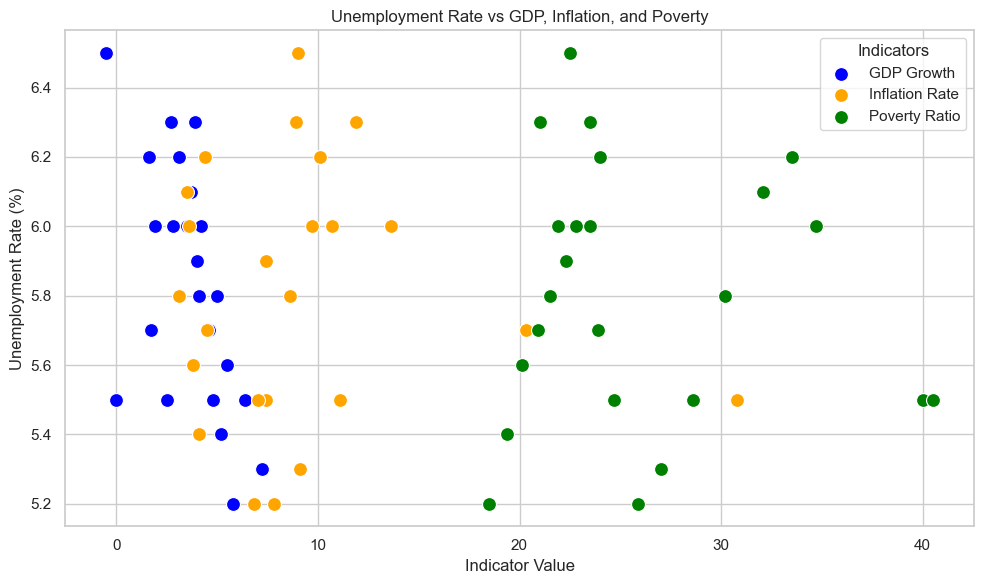

In [21]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='GDP_Growth', y='Unemployment_Rate', data=df, label='GDP Growth', s=100, color='blue')
sns.scatterplot(x='Inflation_Rate', y='Unemployment_Rate', data=df, label='Inflation Rate', s=100, color='orange')
sns.scatterplot(x='Poverty_Ratio', y='Unemployment_Rate', data=df, label='Poverty Ratio', s=100, color='green')

plt.title('Unemployment Rate vs GDP, Inflation, and Poverty')
plt.xlabel('Indicator Value')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Indicators')
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation Heatmap


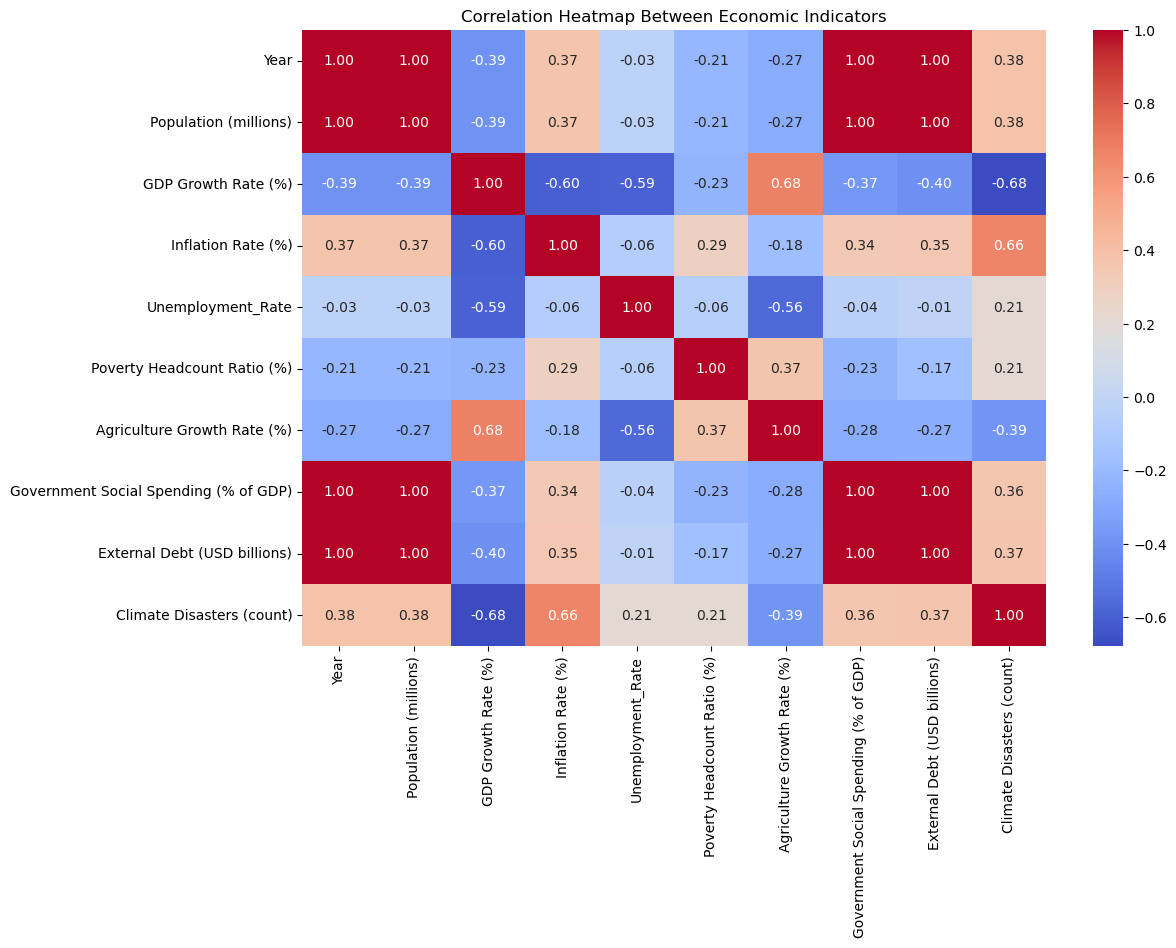

In [32]:
plt.figure(figsize=(12, 8))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap Between Economic Indicators')
plt.show()


# Summary Output



In [33]:
print("\nDescriptive statistics:")
print(df[['Unemployment_Rate', 'GDP Growth Rate (%)', 'Inflation Rate (%)']].describe())



Descriptive statistics:
       Unemployment_Rate  GDP Growth Rate (%)  Inflation Rate (%)
count           24.00000            24.000000           24.000000
mean             5.80000             3.729167            9.050000
std              0.36831             1.919121            6.056617
min              5.20000            -0.500000            3.100000
25%              5.50000             2.650000            4.475000
50%              5.80000             3.950000            8.200000
75%              6.02500             5.050000           10.250000
max              6.50000             7.200000           30.800000
